In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy
import warnings
from tqdm import tqdm
from scipy.sparse.linalg import spsolve
from scipy.sparse import lil_matrix
import pickle
warnings.filterwarnings('ignore')
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import reverse_cuthill_mckee
%matplotlib inline

In [4]:
num_mesh = 1

In [5]:
E = 2*(10**7)*(10**4)
nu = 0.25
num_t = 100
#mu = 0.05
time = np.linspace(0,1,num_t)
dt = 1/num_t
P_right = 10000000*4*(-time**2 + time)
P_up = 10000000*2*(time-0.5)
rho=7.8*1000
dmp = 0.1#np.sqrt(E/(2*(1+nu)*ro))*4/10

start_mesh_i = 0
end_mesh_i = 5
beta1 = 1
beta2 = 1

In [7]:
stress_arr_05_xx = []
stress_arr_05_yy = []
stress_arr_05_xy = []
U_arr_05 = []
verts_arr = []
elements_arr = []
for num_mesh in range(start_mesh_i, end_mesh_i):
    with open(f'results/main_results_{dmp}_{num_mesh}.pkl', 'rb') as f:
        loaded_dict = pickle.load(f)
        #print(loaded_dict)
        verts = loaded_dict["verts"]
        elems = loaded_dict["triag"]
        print(verts.shape)
        print(elems.shape)
        verts_arr.append(verts)
        elements_arr.append(elems)
        U_arr = loaded_dict["U_arr"]
        print(U_arr.shape)
        U_05 = U_arr[-50,0,:].reshape((-1,1))
        U_075 = U_arr[-25,0,:].reshape((-1,1))
        stress_05_, strain_05_ = GetStressAndStrain(elems, verts, U_05, E, nu)
        stress_05_xx=MethodResultantov(stress_05_[:,0], verts, elems)
        stress_05_yy=MethodResultantov(stress_05_[:,1], verts, elems)
        stress_05_xy=MethodResultantov(stress_05_[:,2], verts, elems)

        U_arr_075.append(U_075)
        stress_arr_05_xx.append(stress_05_xx)
        stress_arr_05_yy.append(stress_05_yy)
        stress_arr_05_xy.append(stress_05_xy)


(266, 2)
(214, 4)
(100, 1, 532)


100%|█████████████████████████████████████| 214/214 [00:00<00:00, 14266.79it/s]


(959, 2)
(856, 4)
(100, 1, 1918)


100%|██████████████████████████████████████| 856/856 [00:00<00:00, 9406.54it/s]


(3629, 2)
(3424, 4)
(100, 1, 7258)


100%|████████████████████████████████████| 3424/3424 [00:00<00:00, 6900.68it/s]


(14105, 2)
(13696, 4)
(100, 1, 28210)


100%|██████████████████████████████████| 13696/13696 [00:01<00:00, 9777.92it/s]


(55601, 2)
(54784, 4)
(100, 1, 111202)


100%|█████████████████████████████████| 54784/54784 [00:04<00:00, 11394.66it/s]


In [8]:
stress_arr_075_xx = []
stress_arr_075_yy = []
stress_arr_075_xy = []
U_arr_075 = []

for num_mesh in range(start_mesh_i, end_mesh_i):
    with open(f'results/main_results_{dmp}_{num_mesh}.pkl', 'rb') as f:
        loaded_dict = pickle.load(f)
        #print(loaded_dict)
        verts = loaded_dict["verts"]
        elems = loaded_dict["triag"]
        U_arr = loaded_dict["U_arr"]
        print(U_arr.shape)
        U_075 = U_arr[-25,0,:].reshape((-1,1))
        stress_075_, strain_075 = GetStressAndStrain(elems, verts, U_075, E, nu)
        stress_075_xx=MethodResultantov(stress_075_[:,0], verts, elems)
        stress_075_yy=MethodResultantov(stress_075_[:,1], verts, elems)
        stress_075_xy=MethodResultantov(stress_075_[:,2], verts, elems)
#         stress_05[:,1]=MethodResultantov(stress_05_[:,1], verts, elems)
#         stress_05[:,2]=MethodResultantov(stress_05_[:,2], verts, elems)
        U_arr_075.append(U_075)
        stress_arr_075_xx.append(stress_075_xx)
        stress_arr_075_yy.append(stress_075_yy)
        stress_arr_075_xy.append(stress_075_xy)


(100, 1, 532)


100%|█████████████████████████████████████| 214/214 [00:00<00:00, 14266.34it/s]


(100, 1, 1918)


100%|█████████████████████████████████████| 856/856 [00:00<00:00, 18609.18it/s]


(100, 1, 7258)


100%|███████████████████████████████████| 3424/3424 [00:00<00:00, 13641.45it/s]


(100, 1, 28210)


100%|█████████████████████████████████| 13696/13696 [00:01<00:00, 10192.89it/s]


(100, 1, 111202)


100%|█████████████████████████████████| 54784/54784 [00:04<00:00, 11298.61it/s]


In [57]:
len(elements_arr)

4

In [58]:
len(verts_arr)

4

In [59]:
len(stress_arr_05)

4

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 1485.11it/s]


5
5
5
5
5


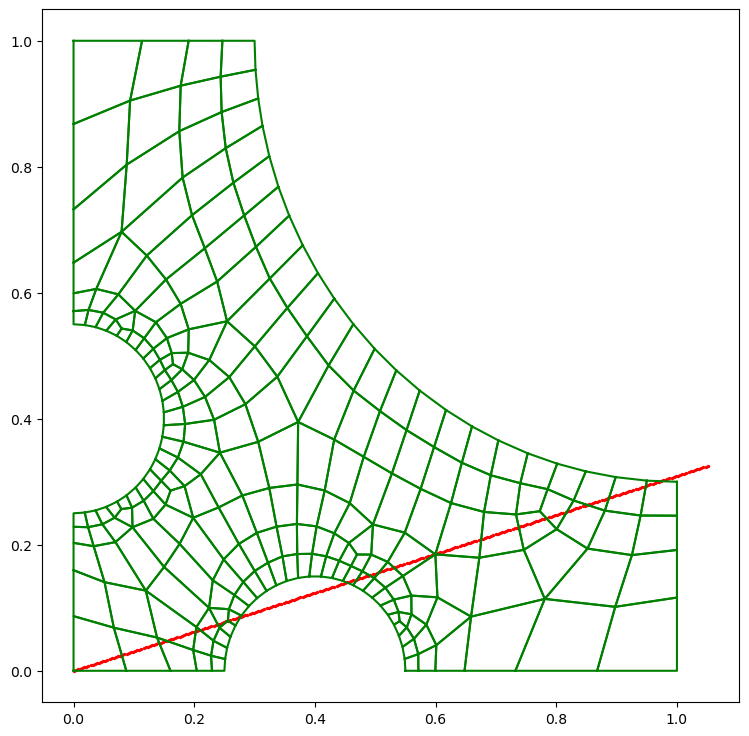

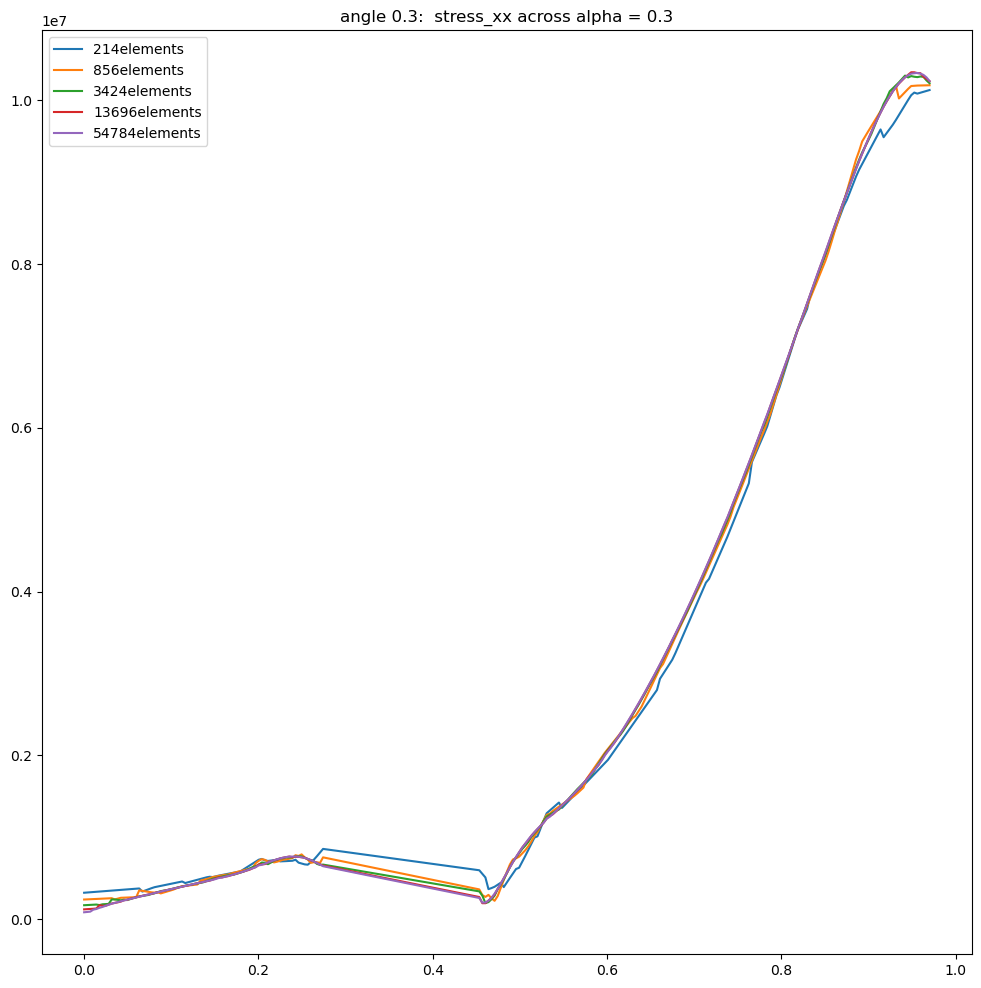

In [19]:
Plot1D_nodes_by_angle_mult(stress_arr_05_xx, 
                           verts_arr, 
                           elements_arr,
                           y=None,
                           alpha=0.3, 
                           a=0, b=1.1, 
                           resol=300, 
                           direct=0, 
                           title1 = "stress_xx",
                           verbose1=True, 
                           verbose2 = True)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 1481.01it/s]


5
5
5
5
5


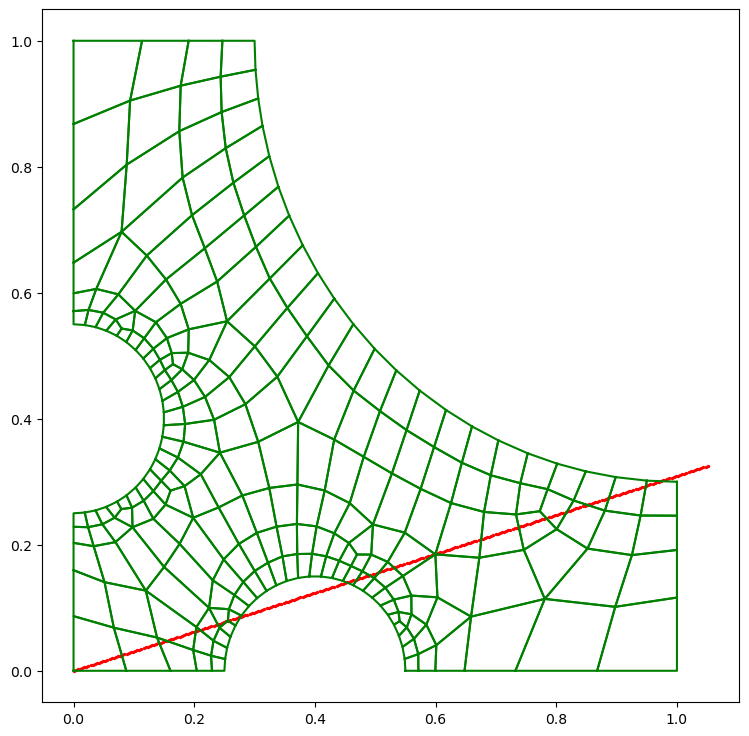

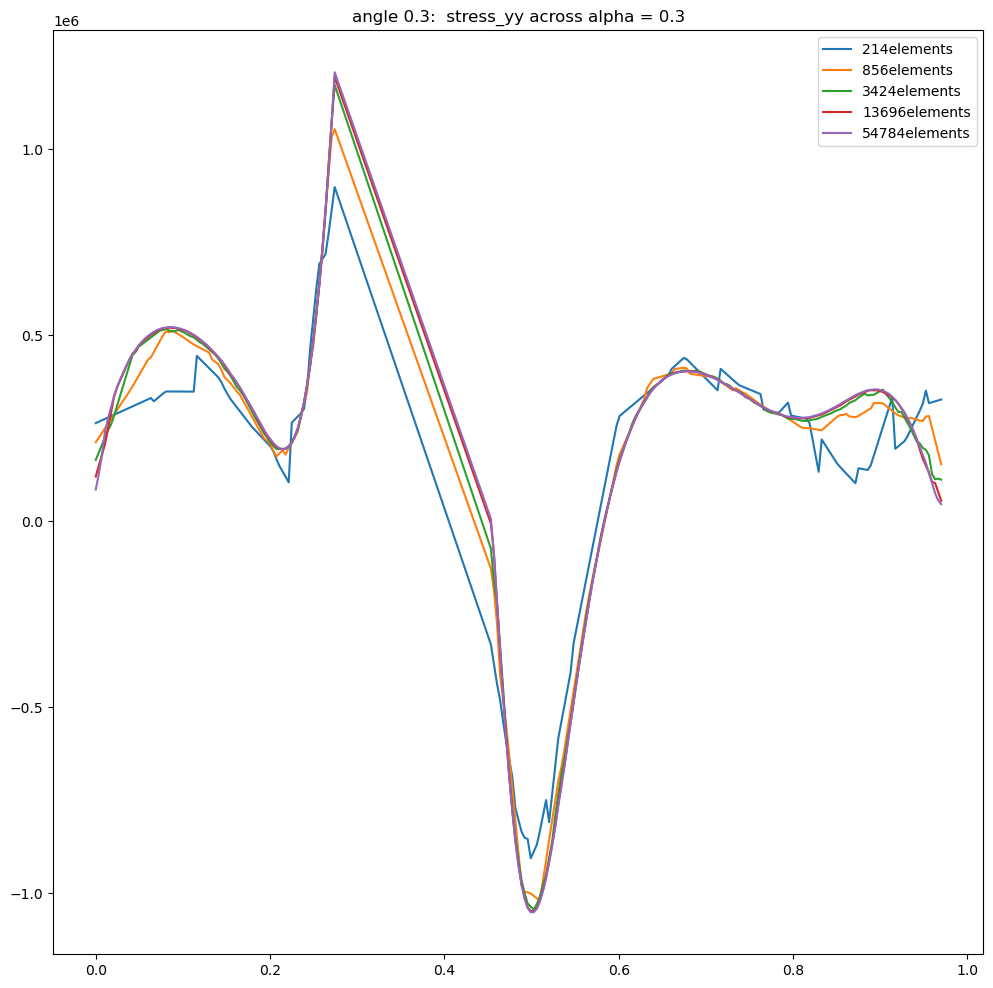

In [20]:
Plot1D_nodes_by_angle_mult(stress_arr_05_yy, 
                           verts_arr, 
                           elements_arr,
                           y=None,
                           alpha=0.3, 
                           a=0, b=1.1, 
                           resol=300, 
                           direct=1, 
                           title1 = "stress_yy",
                           verbose1=True, 
                           verbose2 = True)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 1462.82it/s]


5
5
5
5
5


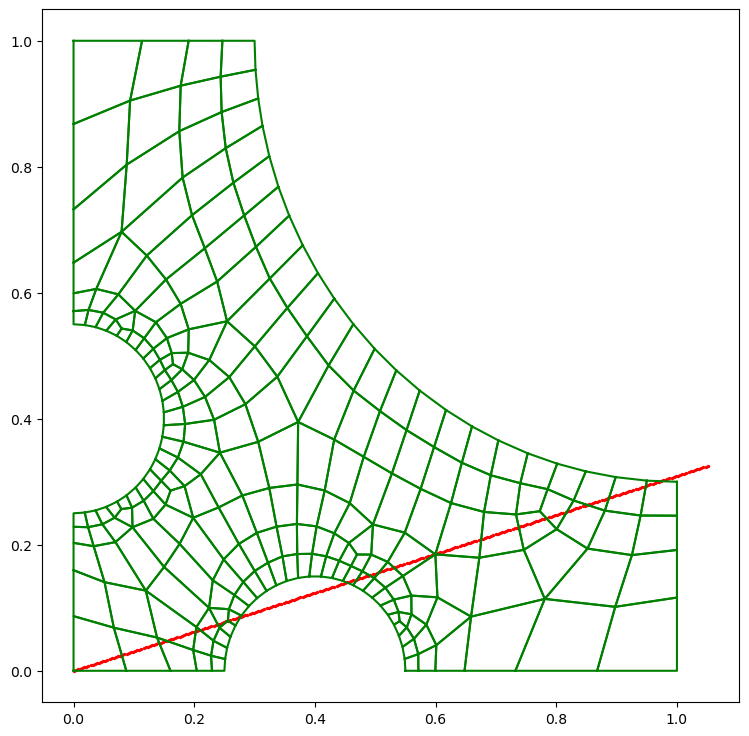

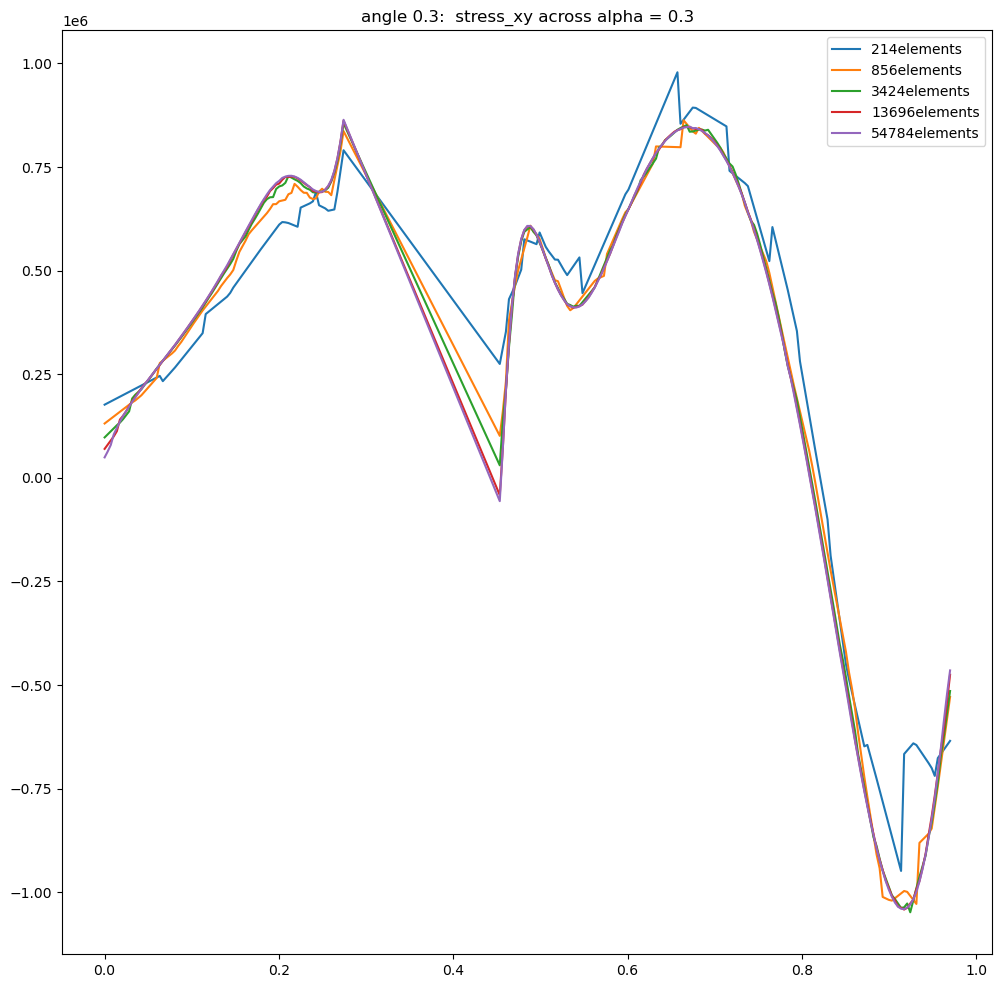

In [21]:
Plot1D_nodes_by_angle_mult(stress_arr_05_xy, 
                           verts_arr, 
                           elements_arr,
                           y=None,
                           alpha=0.3, 
                           a=0, b=1.1, 
                           resol=300, 
                           direct=2, 
                           title1 = "stress_xy",
                           verbose1=True, 
                           verbose2 = True)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 1473.85it/s]


5
5
5
5
5


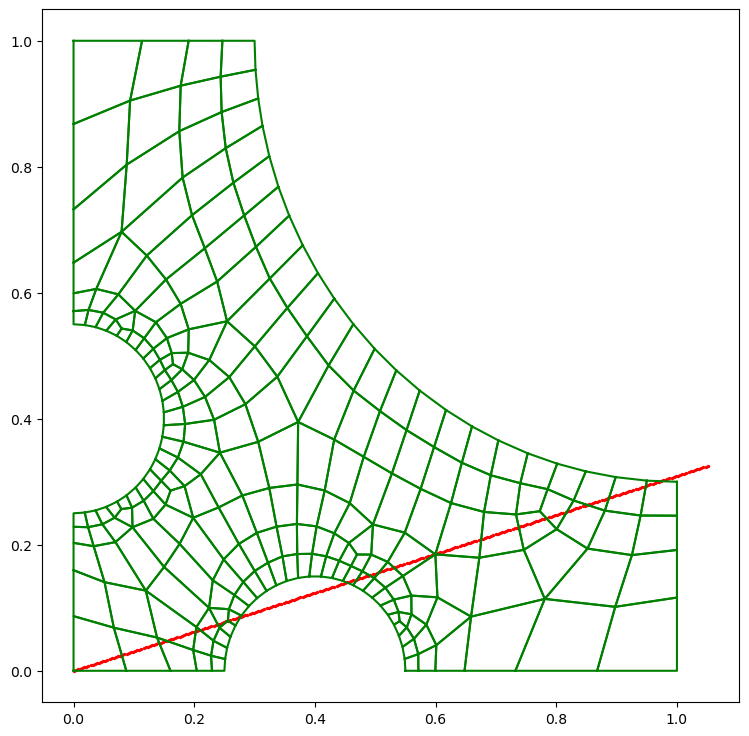

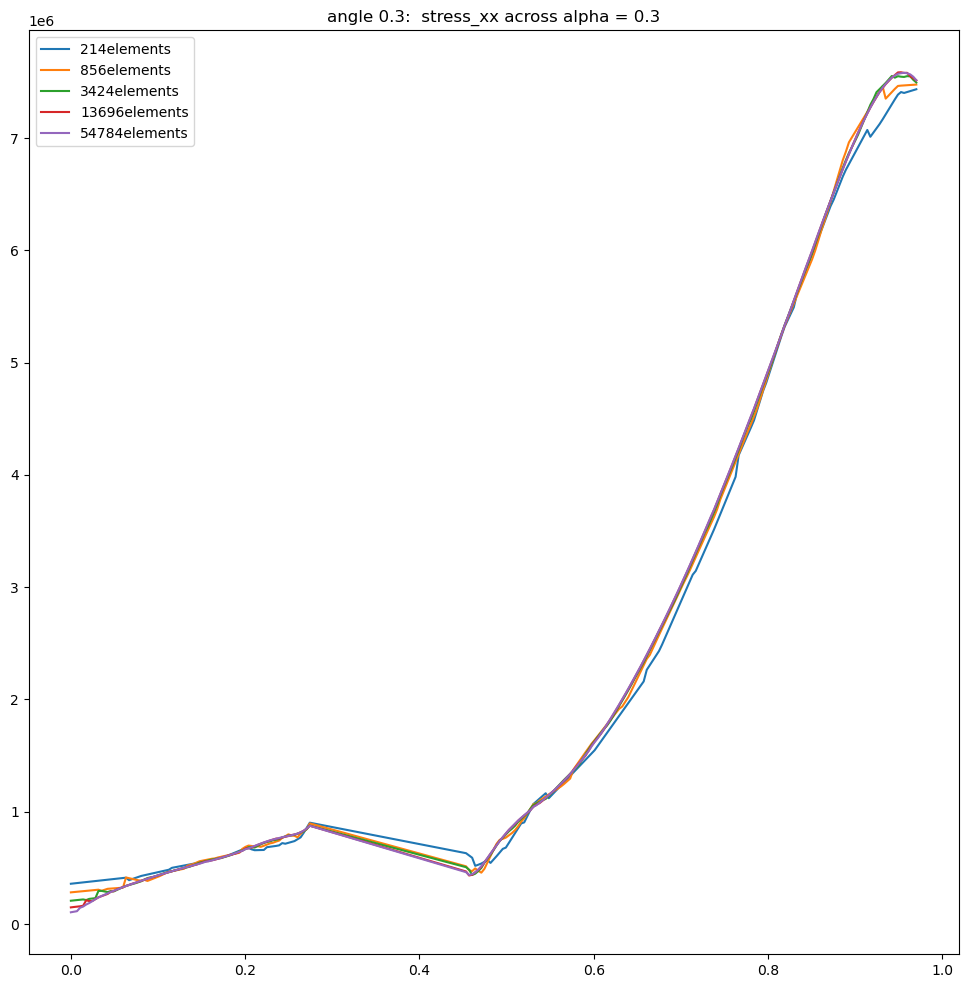

In [22]:
Plot1D_nodes_by_angle_mult(stress_arr_075_xx, 
                           verts_arr, 
                           elements_arr,
                           y=None,
                           alpha=0.3, 
                           a=0, b=1.1, 
                           resol=300, 
                           direct=0, 
                           title1 = "stress_xx",
                           verbose1=True, 
                           verbose2 = True)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 1485.16it/s]


5
5
5
5
5


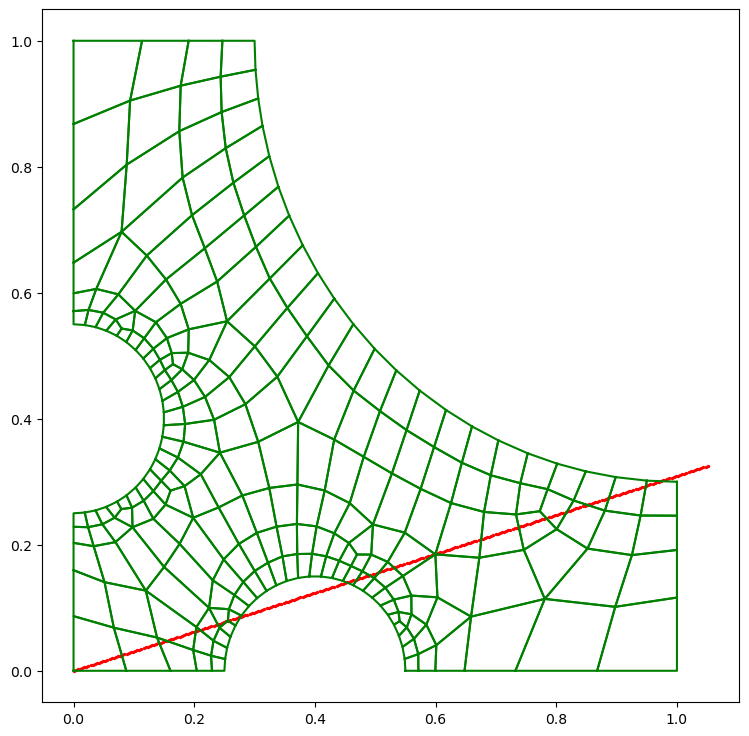

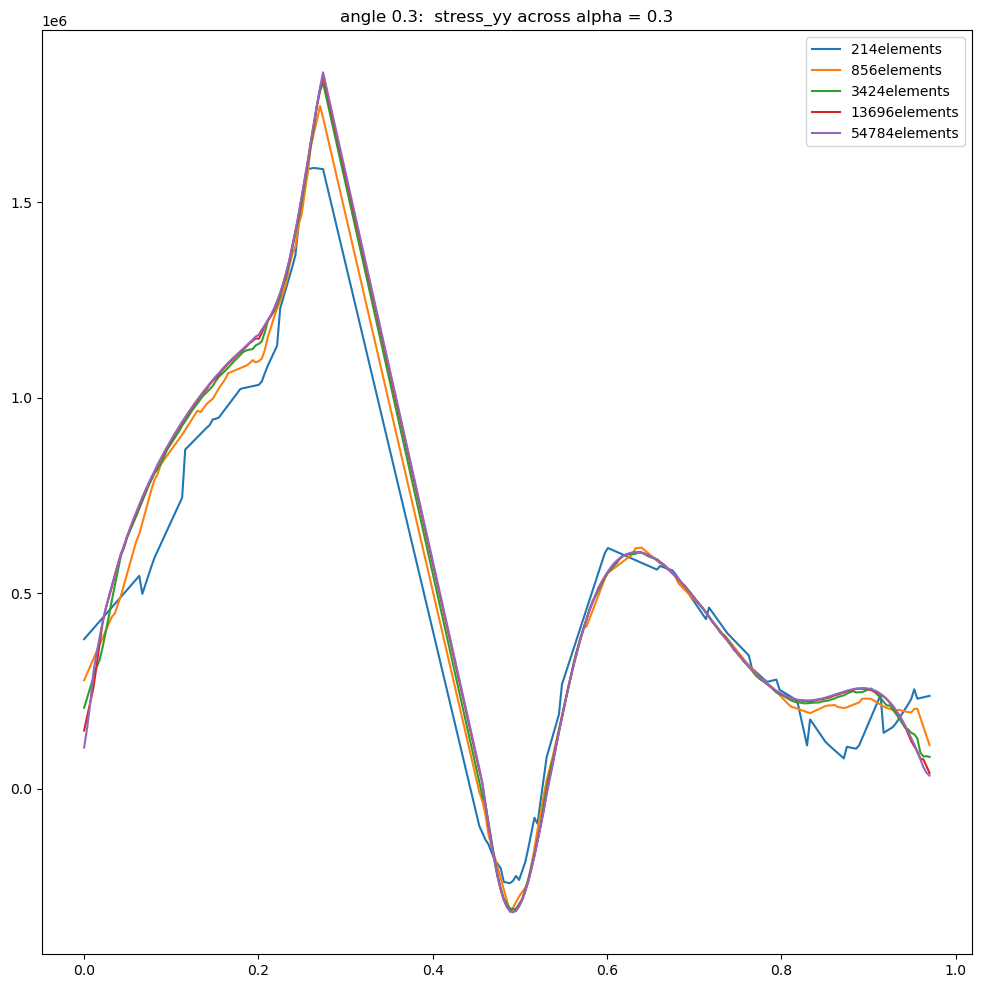

In [23]:
Plot1D_nodes_by_angle_mult(stress_arr_075_yy, 
                           verts_arr, 
                           elements_arr,
                           y=None,
                           alpha=0.3, 
                           a=0, b=1.1, 
                           resol=300, 
                           direct=1, 
                           title1 = "stress_yy",
                           verbose1=True, 
                           verbose2 = True)

100%|██████████████████████████████████████| 300/300 [00:00<00:00, 1492.56it/s]


5
5
5
5
5


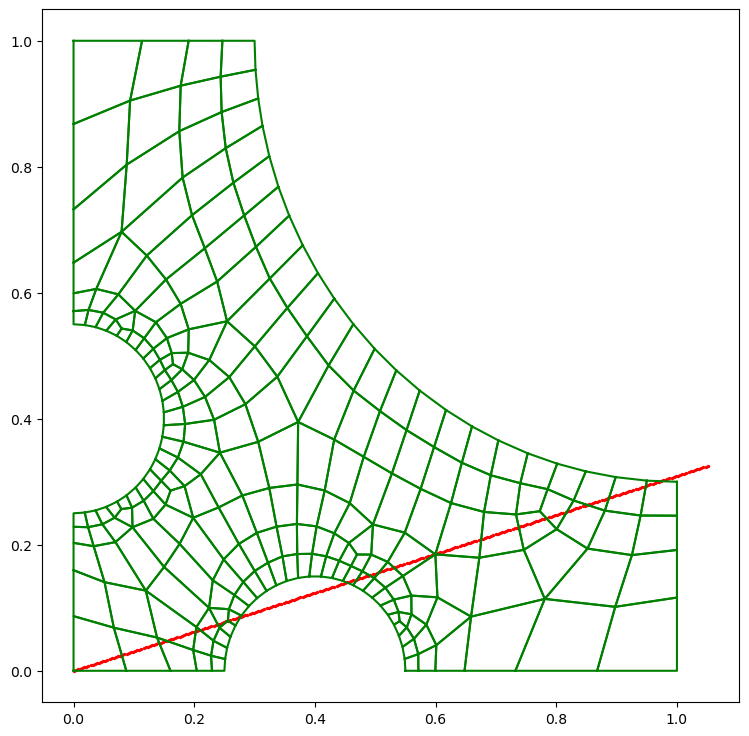

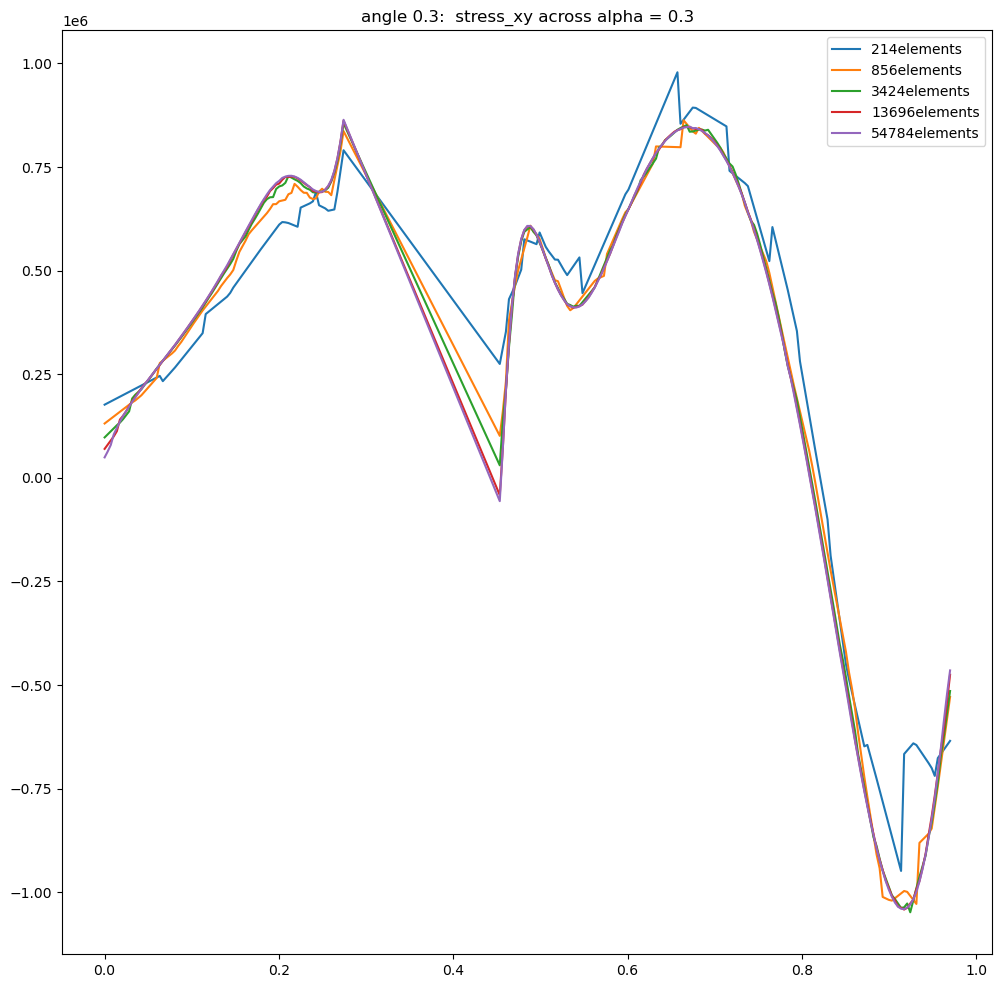

In [24]:
Plot1D_nodes_by_angle_mult(stress_arr_05_xy, 
                           verts_arr, 
                           elements_arr,
                           y=None,
                           alpha=0.3, 
                           a=0, b=1.1, 
                           resol=300, 
                           direct=2, 
                           title1 = "stress_xy",
                           verbose1=True, 
                           verbose2 = True)

# Используемые функции

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def Plot1D_nodes_by_angle_mult(datas,
                               vertss, 
                               elements, 
                               y=None,
                               alpha=None,
                               a=0, 
                               b=1,
                               resol=300, direct=0, title1 = "stress", verbose1=False, verbose2 = False):
    if y != None:
      x1 = np.linspace(a, b, resol)
      y1 = np.zeros(x1.shape)
      y1[::]=y
      
    else:
      if alpha < 0 or alpha > math.pi/2:
        return -1

      if alpha <= math.pi/4:
        len_ = a/math.cos(alpha)
        skip = b/math.cos(alpha)
      else:
        len_ = a/math.sin(alpha)
        skip = b/math.sin(alpha)
      step = np.linspace(b, len_, resol)

      # задаем список разбиений для y формата [старт, конец, количество подможеств]
      x1 = np.zeros(step.shape)
      y1 = np.zeros(step.shape)

      for i in range(y1.shape[0]):
        x1[i] = step[i]*math.cos(alpha)
        y1[i] = step[i]*math.sin(alpha)
    
    # Nx2-список координат середин всех элементов для аналитического решения
   

    xs1 = []
    ys1 = []
    resuses = []
    m=0
    for element, verts in zip(elements, vertss): 
        # список индексов элементов, в которых находятся точки нашей прямой
        xy = np.zeros((element.shape[0],2))
        for i in range(element.shape[0]):
            xy[i][0] = (verts[element[i][0]][0]+verts[element[i][1]][0]+verts[element[i][2]][0]+verts[element[i][3]][0])/4
            xy[i][1] = (verts[element[i][0]][1]+verts[element[i][1]][1]+verts[element[i][2]][1]+verts[element[i][3]][1])/4
        knn = NearestNeighbors(n_neighbors=10)
        knn.fit(xy)
        resus = []
        arr_idxs = []
        x_ret = []
        y_ret = []
        for i in tqdm(range(x1.shape[0])):
            point=np.array([[x1[i], y1[i]]])
            dists, idxs = knn.kneighbors(point)
            flag = 1
            for j in idxs[0].tolist():
                if IsPointInElem(verts, element, j, x1[i], y1[i], eps=1e-12):
                    flag = 0
                    arr_idxs.append(i)
                    new_val = Interpolation(x1[i], y1[i], datas[m], verts, element, j)
                    #x_ret.append(x1[i])
                    #y_ret.append(new_val)
                    resus.append(new_val)
                    break
            if flag == 0:
              x_ret.append(x1[i])
              y_ret.append(new_val)
            else:
              x_ret.append(x1[i])
              y_ret.append(0)

        resuses.append(resus)
        xs1.append(x1[arr_idxs])
        ys1.append(y1[arr_idxs])
        m+=1
    print(len(resuses))
#     if verbose1:
#         plt.figure(figsize = (12,12))
#         plt.triplot(vertss[2][:,0], vertss[2][:,1], elements[2])
#         # добавляем на график с сеткой точки нашей прямой, s - size
#         plt.scatter(x1, y1, s=2, color='green')
#         plt.show()
    if  verbose1:
        plt.figure(figsize = (9,9))
        for elem in elements[0]:
            x_ = [vertss[0][:,0][x1_] for x1_ in elem]
            y_ = [vertss[0][:,1][x1_] for x1_ in elem]
            x_.append(x_[0])
            y_.append(y_[0])
            plt.plot(x_,y_,color="green")
        plt.scatter(x1,y1,s=2, color='red')
    #stress_a = AnalyticalStress(x1, y1)
    print(len(elements))
    if verbose2:
        tlt1 = ' across alpha = {}'.format(alpha)
        plt.figure(figsize = (12,12))
        plt.title("angle " + str(alpha)+ ":  "+title1+tlt1)
        print(len(elements))
        print(len(xs1))
        print(len(resuses))
        for i in range(len(elements)):
            plt.plot(xs1[i], resuses[i], label=str(elements[i].shape[0])+"elements")
    #    plt.plot(x1, stress_a[:,direct])
        plt.legend()
        plt.show()


def quadroplot(triag, verts, color1="green"):
    plt.figure(figsize = (9,9))
    for elem in triag:
        x = [verts[:,0][x1] for x1 in elem]
        y = [verts[:,1][x1] for x1 in elem]
        x.append(verts[:,0][elem[0]])
        y.append(verts[:,1][elem[0]])
        plt.plot(x,y,color=color1)
    plt.show()
    
def quadroplot_borders(triag, verts, left_data, right_data, up_data, down_data, inner_data):
    plt.figure(figsize = (9,9))
    for elem in triag:
        x = [verts[:,0][x1] for x1 in elem]
        y = [verts[:,1][x1] for x1 in elem]
        x.append(verts[:,0][elem[0]])
        y.append(verts[:,1][elem[0]])
        plt.plot(x,y,color="green")
    for elem in triag[left_data[:,0]]:
        x = [verts[:,0][x1] for x1 in elem]
        y = [verts[:,1][x1] for x1 in elem]
        x.append(verts[:,0][elem[0]])
        y.append(verts[:,1][elem[0]])
        plt.plot(x,y,color="red")
    for elem in triag[right_data[:,0]]:
        x = [verts[:,0][x1] for x1 in elem]
        y = [verts[:,1][x1] for x1 in elem]
        x.append(verts[:,0][elem[0]])
        y.append(verts[:,1][elem[0]])
        plt.plot(x,y,color="orange")
    for elem in triag[up_data[:,0]]:
        x = [verts[:,0][x1] for x1 in elem]
        y = [verts[:,1][x1] for x1 in elem]
        x.append(verts[:,0][elem[0]])
        y.append(verts[:,1][elem[0]])
        plt.plot(x,y,color="black")
    for elem in triag[down_data[:,0]]:
        x = [verts[:,0][x1] for x1 in elem]
        y = [verts[:,1][x1] for x1 in elem]
        x.append(verts[:,0][elem[0]])
        y.append(verts[:,1][elem[0]])
        plt.plot(x,y,color="blue")
    for elem in triag[inner_data[:,0]]:
        x = [verts[:,0][x1] for x1 in elem]
        y = [verts[:,1][x1] for x1 in elem]
        x.append(verts[:,0][elem[0]])
        y.append(verts[:,1][elem[0]])
        plt.plot(x,y,color="yellow")
    plt.show()

def plot_3D(triag, verts, col, data, a1=15, a2=10, name = 'stress', axis='x'):
    x = np.zeros(triag.shape[0])
    y = np.zeros(triag.shape[0])
    for i in range(triag.shape[0]):
        x[i] = (verts[triag[i][0]][0]+verts[triag[i][1]][0]+verts[triag[i][2]][0]+verts[triag[i][3]][0])/4
        y[i] = (verts[triag[i][0]][1]+verts[triag[i][1]][1]+verts[triag[i][2]][1]+verts[triag[i][3]][1])/4
    z = data[:,col]
    fig = plt.figure(figsize=(a1,a2))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=1, color='green')
    ax.set_xlabel('х', fontsize=20)
    ax.set_ylabel('у', fontsize=20)
    ax.set_zlabel(axis+' '+name, fontsize=20)
    plt.show()
    
class palette:
    def __init__(self, col):
        self.data = dict()
        for i in range(255):
            self.data[i+1]=i/255
        self.max_=col.max()
        self.min_=col.min()
        self.l1 = len(self.data)
    def obtain_color(self, val):
        delta=(self.l1-1)*(val-self.min_)/(self.max_-self.min_)
        if np.isnan(delta):
            delta = 0
        return [0.1, self.data[int(delta)+1], 0.1]
    
def visualize_res(stress_data, triag, verts, p, col=0, a1=18,a2=9, name='stress', axis='x'):
    cur_palette = palette(stress_data[:,col])
    plt.figure(figsize = (a1,a2))
    for i in tqdm(range(triag.shape[0])):
        color=cur_palette.obtain_color(stress_data[i][col])
        plt.fill([verts[triag[i][0]][0],
                  verts[triag[i][1]][0],
                  verts[triag[i][2]][0],
                  verts[triag[i][3]][0],
                  verts[triag[i][0]][0]], 
                 [verts[triag[i][0]][1],
                  verts[triag[i][1]][1],
                  verts[triag[i][2]][1],
                  verts[triag[i][3]][1],
                  verts[triag[i][0]][1]], color=color)
    plt.title(axis+' '+name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig("{}.png".format(p))
    plt.show()
    
def plot_1D_quad(data, verts, triag, b1, b2, x=None, y=None, resol=100, direct=0, title1 = "x stress", verbose1=False, verbose2 = False):
    if x is not None:
        y1 = np.linspace(b1,b2, resol)
        x1 = np.zeros(y1.shape)
        x1[::]= x
    elif y is not None:
        x1 = np.linspace(b1,b2, resol)
        y1 = np.zeros(x1.shape)
        y1[::]=y
    if verbose1:
        plt.figure(figsize = (9,9))
        for elem in triag:
            x_ = [verts[:,0][x1_] for x1_ in elem]
            y_ = [verts[:,1][x1_] for x1_ in elem]
            x_.append(x_[0])
            y_.append(y_[0])
            plt.plot(x_,y_,color="green")
        plt.scatter(x1,y1,s=2, color='red')
        #plt.show()
    glob_res = []
    for i in tqdm(range(x1.shape[0])):
        resus = []
        for j in range(triag.shape[0]):
            if IsPoinsInElem(verts, triag, j, x1[i], y1[i], eps=1e-10):
                #resus - элемент, в котором есть точка xi yi из нашего разбиения
                resus.append(j)
        if len(resus)>0:
            glob_res.append(resus[0])
        else:
            glob_res.append(-1)
        # glob_res - номера элементов, в которых есть точки из разбиения
    if verbose1:
        for elem in glob_res:
            x_ = [verts[:,0][x1_] for x1_ in triag[elem]]
            y_ = [verts[:,1][x1_] for x1_ in triag[elem]]
            x_.append(x_[0])
            y_.append(y_[0])
            plt.plot(x_,y_,color="blue")
        plt.show()
    if y is not None:
        if verbose2:
            tlt1 = ' across y = {}'.format(y)
            plt.figure(figsize = (9,9))
            plt.title(title1+tlt1)
            plt.plot(x1, data[glob_res][:,direct])
            plt.show()
        return x1, data[glob_res][:,direct]
    elif x is not None:
        if verbose2:
            tlt1 = ' across x = {}'.format(x)
            plt.figure(figsize = (9,9))
            plt.title(title1+tlt1)
            plt.plot(y1, data[glob_res][:,direct])
            plt.show()
        return y1, data[glob_res][:,direct]

def Plot1D_by_angle(data, verts, element, alpha=None, y=None, a=0, b=5, resol=500, direct=0, title1 = "stress", verbose1=False, verbose2 = False):
    if y != None:
      x1 = np.linspace(a, b, resol)
      y1 = np.zeros(x1.shape)
      y1[::]=y
    else:
      if alpha < 0 or alpha > math.pi/2:
        return -1
      if alpha <= math.pi/4:
        len_ = a/math.cos(alpha)
        skip = b/math.cos(alpha)
      else:
        len_ = a/math.sin(alpha)
        skip = b/math.sin(alpha)
      step = np.linspace(b, len_, resol)
      # задаем список разбиений для y формата [старт, конец, количество подможеств]
      x1 = np.zeros(step.shape)
      y1 = np.zeros(step.shape)
      for i in range(y1.shape[0]):
        x1[i] = step[i]*math.cos(alpha)
        y1[i] = step[i]*math.sin(alpha)
    
    # Nx2-список координат середин всех элементов для аналитического решения
    xy = np.zeros((element.shape[0],2))
    for i in range(element.shape[0]):
        xy[i][0] = (verts[element[i][0]][0]+verts[element[i][1]][0]+verts[element[i][2]][0]+verts[element[i][3]][0])/4
        xy[i][1] = (verts[element[i][0]][1]+verts[element[i][1]][1]+verts[element[i][2]][1]+verts[element[i][3]][1])/4

    # заполняем knn.fit точками-серединами элементов
    knn = NearestNeighbors(n_neighbors=15)
    knn.fit(xy)

    # результаты в точке
    resus = []
    # индексы элементов, в которых лежат точки
    arr_idxs = []
    x_ret = []
    y_ret = []

    for i in tqdm(range(x1.shape[0])):
        point = np.array([[x1[i], y1[i]]])
        #dists, idxs = knn.kneighbors(point)
        idxs = knn.kneighbors(point)[1]

        # флаг на то, находится ли точка в каком-то элементе, =1 => не в элементе
        flag = 1
        for j in idxs[0].tolist():
            if IsPoinsInElem(verts, element, j, x1[i], y1[i], eps=1e-12):
                flag = 0
                # добавим индекс точки, для которой нашелся элемент
                arr_idxs.append(i)
                # добавляем с resus значение j-го элемента. Это значение присвоится i-й точке
                resus.append(data[j])
                #x_ret.append(x1[i])
                #y_ret.append(data[j])
                break
        if flag == 0:
          x_ret.append(x1[i])
          y_ret.append(resus[-1])
        else:
          x_ret.append(x1[i])
          y_ret.append(0)

    # оставляем только те точки, которые есть в каком-то элементе
    x1 = x1[arr_idxs]
    y1 = y1[arr_idxs]

    # рисование прямой
    if verbose1:
        plt.figure(figsize = (9,9))
        for elem in element:
            x_ = [verts[:,0][x1_] for x1_ in elem]
            y_ = [verts[:,1][x1_] for x1_ in elem]
            x_.append(x_[0])
            y_.append(y_[0])
            plt.plot(x_,y_,color="green")
        plt.scatter(x1,y1,s=2, color='red')

    if verbose2:
        tlt1 = ' across alpha = {}'.format(alpha)
        plt.figure(figsize = (9,9))
        plt.title("angle " + str(alpha)+ ":  "+title1+tlt1)
        plt.plot(x1, resus)
        plt.show()
    return x_ret, y_ret

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
import codecs
import math

def Plot1D_nodes_by_angle(data, verts, element, alpha=None, y=None, a=0, b=5, resol=500, direct=0, title1 = "stress", verbose1=False, verbose2 = False):
    if y != None:
      x1 = np.linspace(a, b, resol)
      y1 = np.zeros(x1.shape)
      y1[::]=y
      
    else:
      if alpha < 0 or alpha > math.pi/2:
        return -1

      if alpha <= math.pi/4:
        len_ = a/math.cos(alpha)
        skip = b/math.cos(alpha)
      else:
        len_ = a/math.sin(alpha)
        skip = b/math.sin(alpha)
      step = np.linspace(b, len_, resol)

      # задаем список разбиений для y формата [старт, конец, количество подможеств]
      x1 = np.zeros(step.shape)
      y1 = np.zeros(step.shape)

      for i in range(y1.shape[0]):
        x1[i] = step[i]*math.cos(alpha)
        y1[i] = step[i]*math.sin(alpha)
    
    # список индексов элементов, в которых находятся точки нашей прямой
    # XY - центры элементов
    xy = np.zeros((element.shape[0],2))
    for i in range(element.shape[0]):
        xy[i][0] = (verts[element[i][0]][0]+verts[element[i][1]][0]+verts[element[i][2]][0]+verts[element[i][3]][0])/4
        xy[i][1] = (verts[element[i][0]][1]+verts[element[i][1]][1]+verts[element[i][2]][1]+verts[element[i][3]][1])/4
    knn = NearestNeighbors(n_neighbors=7)
    knn.fit(xy)
    resus = []
    arr_idxs = []

    x_ret = []
    y_ret = []
    for i in tqdm(range(x1.shape[0])):
        point=np.array([[x1[i], y1[i]]])
        dists, idxs = knn.kneighbors(point)
        flag = 1
        for j in idxs[0].tolist():
            if IsPoinsInElem(verts, element, j, x1[i], y1[i], eps=1e-12):
                flag = 0
                arr_idxs.append(i)
                new_val = Interpolation(x1[i], y1[i], data, verts, element, j)
                #x_ret.append(x1[i])
                #y_ret.append(new_val)
                resus.append(new_val)
                break
        if flag == 0:
          x_ret.append(x1[i])
          y_ret.append(new_val)
        else:
          x_ret.append(x1[i])
          y_ret.append(0)

    x1 = x1[arr_idxs]
    y1 = y1[arr_idxs]
    if verbose1:
        plt.figure(figsize = (9,9))
        for elem in element:
            x_ = [verts[:,0][x1_] for x1_ in elem]
            y_ = [verts[:,1][x1_] for x1_ in elem]
            x_.append(x_[0])
            y_.append(y_[0])
            plt.plot(x_,y_,color="green")
        plt.scatter(x1,y1,s=2, color='red')
    if verbose2:
        tlt1 = ' across alpha = {}'.format(alpha)
        plt.figure(figsize = (9,9))
        plt.title("angle " + str(alpha)+ ":  "+title1+tlt1)
        plt.plot(x1, resus)
        #plt.plot(x1, stress_a[:,direct])
        plt.xlim([-0.2, b+.2])
        plt.show()
    return x_ret, y_ret


In [18]:
from scipy.sparse import lil_matrix
import scipy
from numpy import linalg
import numpy as np
from tqdm import tqdm
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import pickle

# Функции формы 4-х угольного элемента в координатах ksi, eta
def N_1(e, n):
    return 1/4*(1-e)*(1-n)
def N_2(e, n):
    return 1/4*(1+e)*(1-n)
def N_3(e, n):
    return 1/4*(1+e)*(1+n)
def N_4(e, n):
    return 1/4*(1-e)*(1+n)

# производные x/y по ksi/eta
def dX_dKsi(arr, e, n):
    return 1/4*(arr[0]*(n-1)+arr[1]*(1-n)+arr[2]*(1+n)+arr[3]*(-1-n))
def dY_dKsi(arr, e, n):
    return 1/4*(arr[0]*(n-1)+arr[1]*(1-n)+arr[2]*(1+n)+arr[3]*(-1-n))
def dX_dEta(arr, e, n):
    return 1/4*(arr[0]*(e-1)+arr[1]*(-1-e)+arr[2]*(1+e)+arr[3]*(1-e))
def dY_dEta(arr, e, n):
    return 1/4*(arr[0]*(e-1)+arr[1]*(-1-e)+arr[2]*(1+e)+arr[3]*(1-e))


def dN_dKsidEta(e, n):
    return 1/4*np.array([[n-1, 1-n, 1+n, -1-n],[e-1, -1-e, 1+e, 1-e]])

def Jacobian(x_arr, y_arr, e, n):
    return np.array([[dX_dKsi(x_arr, e, n), dY_dKsi(y_arr, e, n)], [dX_dEta(x_arr, e, n), dY_dEta(y_arr, e, n)]])

# def Jacobian(x_arr, y_arr, e, n):
#     return np.array([[dX_dKsi(x_arr, e, n),dX_dEta(x_arr, e, n) ], [dY_dKsi(y_arr, e, n), dY_dEta(y_arr, e, n)]])

def InverseJacobian(x_arr, y_arr, e, n):
    res = np.array([[dY_dEta(y_arr, e, n), -dY_dKsi(y_arr, e, n)], [-dX_dEta(x_arr, e, n), dX_dKsi(x_arr, e, n)]])
    #res = np.array([[dY_dEta(y_arr, e, n), -dX_dEta(x_arr, e, n)], [-dY_dKsi(y_arr, e, n), dX_dKsi(x_arr, e, n)]])
    b = np.linalg.det(res)
    return 1/b*res, b

# def InverseJacobian(x_arr, y_arr, e, n):
#     res = np.array([[dY_dEta(y_arr, e, n), -dX_dEta(x_arr, e, n)], [-dY_dKsi(y_arr, e, n),dX_dKsi(x_arr, e, n)]])
#     #res = np.array([[dY_dEta(y_arr, e, n), -dX_dEta(x_arr, e, n)], [-dY_dKsi(y_arr, e, n), dX_dKsi(x_arr, e, n)]])
#     b = np.linalg.det(res)
#     return 1/b*res, b

def dN_dXdY(inv_jac, e, n):
    return inv_jac@dN_dKsidEta(e, n)

def GenerateB(mat):
    dN1_dx = mat[0,0]
    dN2_dx = mat[0,1]
    dN3_dx = mat[0,2]
    dN4_dx = mat[0,3]
    dN1_dy = mat[1,0]
    dN2_dy = mat[1,1]
    dN3_dy = mat[1,2]
    dN4_dy = mat[1,3]
    return np.array([[dN1_dx, 0, dN2_dx, 0, dN3_dx, 0, dN4_dx, 0],
                     [0, dN1_dy, 0, dN2_dy, 0, dN3_dy, 0, dN4_dy],
                     [dN1_dy, dN1_dx, dN2_dy, dN2_dx, dN3_dy, dN3_dx, dN4_dy, dN4_dx]])

def GenerateD(E, nu):
    return E/(1-nu**2)*np.array([[1, nu, 0],[nu, 1, 0], [0, 0, (1-nu)/2]])

def GenerateLocalK(x_arr, y_arr, D_mat):
    cnst = np.sqrt(3)
    res = np.zeros((8,8))
    points = [(-1.0/cnst, -1.0/cnst), (1.0/cnst, -1.0/cnst), (1.0/cnst, 1.0/cnst), (-1.0/cnst, 1.0/cnst)]
    for point in points:
        inv_jac, j_det = InverseJacobian(x_arr, y_arr, point[0], point[1])
        mat1 = dN_dXdY(inv_jac, point[0], point[1])
        B_mat = GenerateB(mat1)
        res += (((B_mat.T@D_mat)@B_mat)*j_det)
    return res

def GenerateN(e, n):
    N1 = N_1(e, n)
    N2 = N_2(e, n)
    N3 = N_3(e, n)
    N4 = N_4(e, n)
    return np.array([[N1, 0.0, N2, 0.0, N3, 0.0, N4, 0.0], [0.0, N1, 0.0, N2, 0.0, N3, 0.0, N4]])

def GenerateLocalM(x_arr, y_arr, ro):
    cnst = np.sqrt(3)
    res = np.zeros((8,8))
    points = [(-1.0/cnst, -1.0/cnst), (1.0/cnst, -1.0/cnst), (1.0/cnst, 1.0/cnst), (-1.0/cnst, 1.0/cnst)]
    for point in points:
        inv_jac, j_det = InverseJacobian(x_arr, y_arr, point[0], point[1])
        NN = GenerateN(point[0], point[1])
        res += ((NN.T@NN)*j_det*ro)
    return res

def GenerateLocalKquad(verts, triag, E, nu):
    global_K = lil_matrix((verts.shape[0]*2, verts.shape[0]*2))
    for m in range(triag.shape[0]):
        x_arr = verts[triag[m], 0]
        y_arr = verts[triag[m], 1]
        D_mat = GenerateD(E, nu)
        local_k = GenerateLocalK(x_arr, y_arr, D_mat)
        for i in range(8):
            for j in range(8):
                global_K[2 * triag[m][i // 2] + i % 2, 2 * triag[m][j // 2] + j % 2] += local_k[i, j]
    return global_K

def GenerateK(verts, triag, E, nu):
    global_K = lil_matrix((verts.shape[0]*2, verts.shape[0]*2))
    for m in range(triag.shape[0]):
        x_arr = verts[triag[m], 0]
        y_arr = verts[triag[m], 1]
        D_mat = GenerateD(E, nu)
        local_k = GenerateLocalK(x_arr, y_arr, D_mat)
        for i in range(8):
            for j in range(8):
                global_K[2 * triag[m][i // 2] + i % 2, 2 * triag[m][j // 2] + j % 2] += local_k[i, j]
    return global_K

def GenerateM(verts, triag, ro):
    global_M = lil_matrix((verts.shape[0]*2, verts.shape[0]*2))
    for m in tqdm(range(triag.shape[0])):
        x_arr = verts[triag[m], 0]
        y_arr = verts[triag[m], 1]
        local_m = GenerateLocalM(x_arr, y_arr, ro)
        for i in range(8):
            for j in range(8):
                global_M[2 * triag[m][i // 2] + i % 2, 2 * triag[m][j // 2] + j % 2] += local_m[i, j]
    return global_M

def ElemsArea(verts, triag, i):
    x1 = verts[triag[i][0]][0]
    y1 = verts[triag[i][0]][1]
    x2 = verts[triag[i][1]][0]
    y2 = verts[triag[i][1]][1]
    x3 = verts[triag[i][2]][0]
    y3 = verts[triag[i][2]][1]
    x4 = verts[triag[i][2]][0]
    y4 = verts[triag[i][2]][1]
    cur_det = np.array([[x1, y1, 1], [x2, y2, 1], [x3, y3, 1]])
    elem_area = np.abs(1/2*np.linalg.det(cur_det))
    cur_det = np.array([[x3, y3, 1], [x4, y4, 1], [x1, y1, 1]])
    elem_area += np.abs(1/2*np.linalg.det(cur_det))
    return elem_area

def ElemsArea_gener(x1, y1, x2, y2, x3, y3):
    cur_det = np.array([[x1, y1, 1], [x2, y2, 1], [x3, y3, 1]])
    elem_area = np.abs(1/2*np.linalg.det(cur_det))
    return elem_area

def IsPointInElem(verts, triag, i, x5, y5, eps = 0.000001):
    x1 = verts[triag[i][0]][0]
    y1 = verts[triag[i][0]][1]
    x2 = verts[triag[i][1]][0]
    y2 = verts[triag[i][1]][1]
    x3 = verts[triag[i][2]][0]
    y3 = verts[triag[i][2]][1]
    S0 = ElemsArea_gener(x1, y1, x2, y2, x3, y3)
    S1 = ElemsArea_gener(x5, y5, x2, y2, x3, y3)
    S2 = ElemsArea_gener(x1, y1, x5, y5, x3, y3)
    S3 = ElemsArea_gener(x1, y1, x2, y2, x5, y5)
    if abs(S0 - S1 - S2 -S3) <eps:
        return True
    
    x1 = verts[triag[i][2]][0]
    y1 = verts[triag[i][2]][1]
    x2 = verts[triag[i][3]][0]
    y2 = verts[triag[i][3]][1]
    x3 = verts[triag[i][0]][0]
    y3 = verts[triag[i][0]][1]
    S0 = ElemsArea_gener(x1, y1, x2, y2, x3, y3)
    S1 = ElemsArea_gener(x5, y5, x2, y2, x3, y3)
    S2 = ElemsArea_gener(x1, y1, x5, y5, x3, y3)
    S3 = ElemsArea_gener(x1, y1, x2, y2, x5, y5)
    if abs(S0 - S1 - S2 -S3) <eps:
        return True
    return False
    
def GenerateNormalClear(verts, data):    
    n_vec = []
    for i in range(data.shape[0]):
        nx = verts[data[i][2]][1] - verts[data[i][1]][1]
        ny = verts[data[i][1]][0] - verts[data[i][2]][0]
        nx = nx/np.sqrt(nx**2+ny**2)
        ny = ny/np.sqrt(nx**2+ny**2)
        test_x = verts[data[i][2]][0] - verts[data[i][3]][0]
        test_y = verts[data[i][2]][1] - verts[data[i][3]][1]
        if test_x*nx +test_y*ny < 0:
            nx = -nx
            ny = -ny
        n_vec.append([nx, ny])
    n_vec = np.array(n_vec)
    return n_vec
    
def NeumannBC(verts, data, global_F, P):
    n_vec = GenerateNormalClear(verts, data)
    for i in range(data.shape[0]):
        l = np.sqrt(np.sum((verts[data[i][1]]- verts[data[i][2]])**2))/2
        global_F[2*data[i][1], :] += (P*n_vec[i][0]*l)
        global_F[2*data[i][1]+1, :] += (P*n_vec[i][1]*l)
        global_F[2*data[i][2], :] += (P*n_vec[i][0]*l)
        global_F[2*data[i][2]+1, :] += (P*n_vec[i][1]*l)
    return global_F

def DirichletBC(global_K, global_F, global_M, data, moves):
    fixes = np.array(list(set(data[:,1]) | set(data[:,2])))
    if not np.isnan(moves[0][0]):
        x = 2*fixes
        #print(moves[1,:].shape)
        global_F[x, :] = np.ones((len(x), 1)) @ moves[0].reshape((1,-1))
        extra_F = lil_matrix(global_F.shape)
        extra_F[x, :] = np.ones((len(x), 1)) @ moves[0].reshape((1,-1))
        global_F = global_F - global_K.dot(extra_F)
        temp = np.diag(np.ones(len(x))) @ global_K[x, x].reshape((-1,1))
        global_K[x, :] = 0
        global_K[:, x] = 0
        global_K[x, x] = temp
        
        
        temp = np.diag(np.ones(len(x))) @ global_M[x, x].reshape((-1,1))
        global_M[x, :] = 0
        global_M[:, x] = 0
        global_M[x, x] = temp
        
    if not np.isnan(moves[0][1]):
        x = 2*fixes+1
        #print(moves[1,:].shape)
        global_F[x, :] = np.ones((len(x), 1)) @ moves[1,:].reshape((1,-1))
        extra_F = lil_matrix(global_F.shape)
        extra_F[x, :] = np.ones((len(x), 1)) @ moves[1, :].reshape((1,-1))
        global_F = global_F - global_K.dot(extra_F)
        temp = np.diag(np.ones(len(x))) @ global_K[x, x].reshape((-1,1))
        global_K[x, :] = 0
        global_K[:, x] = 0
        global_K[x, x] = temp
        
        temp = np.diag(np.ones(len(x))) @ global_M[x, x].reshape((-1,1))
        global_M[x, :] = 0
        global_M[:, x] = 0
        global_M[x, x] = temp
        
    
    return global_K, global_F, global_M

def ResultForElem(triag, x_arr, y_arr, U, D, i):
    u_loc = np.zeros((8,1))
    u_loc[0] = U[triag[i][0]*2][0]
    u_loc[1] = U[triag[i][0]*2+1][0]
    u_loc[2] = U[triag[i][1]*2][0]
    u_loc[3] = U[triag[i][1]*2+1][0]
    u_loc[4] = U[triag[i][2]*2][0]
    u_loc[5] = U[triag[i][2]*2+1][0]
    u_loc[6] = U[triag[i][3]*2][0]
    u_loc[7] = U[triag[i][3]*2+1][0]
    inv_jac, j_det = InverseJacobian(x_arr, y_arr, 0.0, 0.0)
    mat1 = dN_dXdY(inv_jac, 0.0, 0.0)
    B_mat = GenerateB(mat1)
    strain = B_mat.dot(u_loc)
    stress = D.dot(strain)
    return stress, strain

def GetStressAndStrain(triag, verts, U, E, nu):
    stress_data = np.zeros((triag.shape[0],3))
    strain_data = np.zeros((triag.shape[0],3))
    D = GenerateD(E, nu)
    for i in tqdm(range(triag.shape[0])):
        x_arr = verts[triag[i], 0]
        y_arr = verts[triag[i], 1]
        stress, strain = ResultForElem(triag, x_arr, y_arr, U, D, i)
        stress_data[i] = stress.reshape(1,-1)
        strain_data[i] = strain.reshape(1,-1)
    return stress_data, strain_data

class palette1:
    def __init__(self, col):
        self.data = dict()
        for i in range(255):
            self.data[i+1]=i/255
        self.max_=col.max()
        self.min_=col.min()
        self.l1 = len(self.data)
    def obtain_color(self, val):
        delta=(self.l1-1)*(val-self.min_)/(self.max_-self.min_)
        if np.isnan(delta):
            delta = 0
        return [0.1, self.data[int(delta)+1], 0.1]

def vzz(stress_data, triag, verts, p, col=0, a1=18,a2=9, name='stress', axis='x'):
    cur_palette = palette1(stress_data[:,col])
    plt.figure(figsize = (a1,a2))
    for i in tqdm(range(triag.shape[0])):
        color=cur_palette.obtain_color(stress_data[i][col])
        plt.fill([verts[triag[i][0]][0],
                  verts[triag[i][1]][0],
                  verts[triag[i][2]][0],
                  verts[triag[i][3]][0],
                  verts[triag[i][0]][0]], 
                 [verts[triag[i][0]][1],
                  verts[triag[i][1]][1],
                  verts[triag[i][2]][1],
                  verts[triag[i][3]][1],
                  verts[triag[i][0]][1]], color=color)
    plt.title(axis+' '+name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig("{}.png".format(p))
    plt.show()
    
    
def Newmark(verts, 
            elems, 
            beta1,
            beta2,
            dt,
            time,
            leftBound, 
            rightBound,
            upBound, 
            downBound,
            otherBound,
            # file_num,
            E, nu, rho, P_up, P_right, dmp, 
            # filename_1, 
            eps=0.001):
      
    U_arr_local = []
         
    K = GenerateK(verts, elems, E, nu)
    M = GenerateM(verts, elems, rho)
    F = lil_matrix((2*verts.shape[0], P_up.shape[0]))
#     F = GetGlobalF(verts, neu_bound, F, P)
#     F = GetGlobalF(verts,downBound2, F, 1000*P)
#     F = GetGlobalF(verts,upBound2, F, 1000*P)
#     F = GetGlobalF(verts,leftBound2, F, 1000*P)
    F = NeumannBC(verts, upBound, F, P_up)
    F = NeumannBC(verts, rightBound, F, P_right)
    K, F, M = DirichletBC(K, F, M, leftBound, np.array([0*time, 0*time]),)
#     K, F = ApplyBoundCond(K, F, rightBound1, [0, None])
    K, F, M = DirichletBC(K, F, M, downBound, np.array([0*time, 0*time]), )
#     K, F = ApplyBoundCond(K, F, upBound1, [None, 0])
  
               
    K=K.tocsr()
    F=F.tocsr()
    #K_arr.append(K)
    #F_arr.append(F)
    print("Вычисляем перемещения")
    perm = reverse_cuthill_mckee(K)
    K_perm = K[perm]
    M_perm = M[perm]
    K_perm = K_perm[:, perm]
    M_perm = M_perm[:, perm]
    F_perm = F[perm]
    
    K = K_perm
    M = M_perm
    F = F_perm
    
    invperm = np.zeros_like(perm)
    invperm[perm] = np.arange(len(invperm), dtype=perm.dtype)
    
    K_new = M +dmp*M*dt*beta1+ K*(dt**2/2*beta2)
    
    U = lil_matrix((2*len(verts), 1)).tocsr()
    V = lil_matrix((2*len(verts), 1)).tocsr()
    A = lil_matrix((2*len(verts), 1)).tocsr()
    
    for ti, t in tqdm(enumerate(time)):
        
        F_new = F[:,ti] - dmp*M@(V + A*dt*(1-beta1)).reshape((-1,1)) - \
                K@(U + V*dt + A*(dt**2/2*(1-beta2))).reshape((-1,1))
        
        A1    = spsolve(K_new,F_new).reshape((-1,1))
        V1    = V + A*dt*(1-beta1) + A1*dt*beta1
        U1    = U + V*dt + A*(dt**2/2*(1-beta2)) + A1*(dt**2/2*beta2)

        U = U1
        V = V1
        A = A1
        
        U_invperm=U[invperm].reshape(-1)
        U_arr_local.append(U_invperm)
    return np.array(U_arr_local)



def N_resultantov(e, n):
    N1 = N_1(e, n)
    N2 = N_2(e, n)
    N3 = N_3(e, n)
    N4 = N_4(e, n)
    return np.array([N1, N2, N3, N4])

def GenerateLocalC(x_arr, y_arr):
    cnst = np.sqrt(3)
    res = np.zeros((4,4))
    points = [(-1.0/cnst, -1.0/cnst), (1.0/cnst, -1.0/cnst), (1.0/cnst, 1.0/cnst), (-1.0/cnst, 1.0/cnst)]
    for point in points:
        inv_jac, j_det = InverseJacobian(x_arr, y_arr, point[0], point[1])
        NN = N_resultantov(point[0], point[1])
        res += ((NN.T@NN)*j_det)
    return res

def GenerateC(verts, triag):
    global_C = lil_matrix((verts.shape[0], verts.shape[0]))
    for m in tqdm(range(triag.shape[0])):
        x_arr = verts[triag[m], 0]
        y_arr = verts[triag[m], 1]
        local_c = GenerateLocalC(x_arr, y_arr)
        for i in range(4):
            for j in range(4):
                global_C[triag[m][i], triag[m][j]] += local_c[i, j]
    return global_C

def MethodResultantov4(data, verts, elements):
    R = np.zeros(len(verts))
    for key, val in enumerate(elements):
        x1, y1 = verts[val[0]]
        x2, y2 = verts[val[1]]
        x3, y3 = verts[val[2]]
        x4, y4 = verts[val[3]]

        s_osn = 1/2*np.abs((x1*y2-x2*y1)+(x2*y3-x3*y2)+(x3*y4-x4*y3)+(x4*y1-x1*y4))

        R[[val[0], val[1], val[2], val[3]]] += data[key] * s_osn/3

    C = GenerateC(verts, elements)
    C = C.todense()
    res = np.linalg.solve(C, R)
    return res

from itertools import product
def MethodResultantov(data, verts, elements):
    C = np.zeros(shape=(len(verts), len(verts)))
    R = np.zeros(len(verts))
    for key, val in enumerate(elements):
        for i in range(2):
          for k in range(i+1, 3):
            for l in range(k+1, 4):
              if IsTriangle(verts[val[i]], verts[val[k]], verts[val[l]]) and IsTriangle(verts[val[(i+2)%4]], verts[val[(k+2)%4]], verts[val[(l+2)%4]]):
                trs = [[i, k, l], [(i+2)%4, (k+2)%4, (l+2)%4]]
                break

        for i in range(2):
          x1, y1 = verts[val[trs[i][0]]]
          x2, y2 = verts[val[trs[i][1]]]
          x3, y3 = verts[val[trs[i][2]]]
          dlt = abs((x1 - x3) * (y2 - y3) - (x2 - x3) * (y1 - y3)) / 2
          R[[val[trs[i][0]], val[trs[i][1]], val[trs[i][2]]]] += data[key] * dlt/3
          for n1, n2 in product([val[trs[i][0]], val[trs[i][1]], val[trs[i][2]]],
                                [val[trs[i][0]], val[trs[i][1]], val[trs[i][2]]]):
              if n1 == n2:
                  C[n1, n2] += dlt/6
              else:
                  C[n1, n2] += dlt/12
    sC = sparse.csr_matrix(C) 
    sR = sparse.csr_matrix(R) 
    res = spsolve(C, R)
    return res


def IsTriangle(vertex1, vertex2, vertex3):
    side1 = ((vertex2[0] - vertex1[0])**2 + (vertex2[1] - vertex1[1])**2)**0.5
    side2 = ((vertex3[0] - vertex2[0])**2 + (vertex3[1] - vertex2[1])**2)**0.5
    side3 = ((vertex1[0] - vertex3[0])**2 + (vertex1[1] - vertex3[1])**2)**0.5

    if side1 + side2 > side3 and side2 + side3 > side1 and side3 + side1 > side2:
        return True
    else:
        return False

def IsPointInElem_gener(x, y, x1, y1, x2, y2, x3, y3, eps = 0.000001):
    S0 = ElemsArea_gener(x1, y1, x2, y2, x3, y3)
    S1 = ElemsArea_gener(x, y, x2, y2, x3, y3)
    S2 = ElemsArea_gener(x1, y1, x, y, x3, y3)
    S3 = ElemsArea_gener(x1, y1, x2, y2, x, y)

    # если точка внутри элемента, то сумма площадей трех образованных треугольников равна сумме площади элемента 
    if abs(S0 - S1 - S2 -S3) <eps:
        return True
    return False


def Interpolation(x, y, verts_value, verts, elems, j):
    for i in range(2):
      for k in range(i+1, 3):
        for l in range(k+1, 4):
          if IsTriangle(verts[elems[j][i]], verts[elems[j][k]], verts[elems[j][l]]):
            if IsPointInElem_gener(x, y, verts[elems[j][i]][0], verts[elems[j][i]][1], verts[elems[j][k]][0], verts[elems[j][k]][1], verts[elems[j][l]][0], verts[elems[j][l]][1], eps=1e-10):
              nodes = [elems[j][i], elems[j][k], elems[j][l]]
              break

    F = [verts_value[nodes[0]], verts_value[nodes[1]], verts_value[nodes[2]]]
    X = [verts[nodes[0]][0], verts[nodes[1]][0], verts[nodes[2]][0]]
    Y = [verts[nodes[0]][1], verts[nodes[1]][1], verts[nodes[2]][1]]
    """
    N1 = ((y2 - y3)x + (x3 - x2)y + x2y3 - x3y2)/(2delta)
    N2 = ((y3 - y1)x + (x1 - x3)y + x3y1 - x1y3)/(2delta)
    N3 = ((y1 - y2)x + (x2 - x1)y + x1y2 - x2y1)/(2delta)
    """
    b = [Y[i%3] - Y[(i+1)%3] for i in range(1, 4)] # b = [Y[1]-Y[2], Y[2]-Y[0], Y[0]-Y[1]] - коэф при x
    c = [-X[i%3] + X[(i+1)%3] for i in range(1, 4)] # коэф при y
    a = [X[i%3] * Y[(i+1)%3] - X[(i+1)%3] * Y[i%3] for i in range(1, 4)] # коэф свободных членов

    A = ElemsArea_gener(X[0], Y[0], X[1], Y[1], X[2], Y[2])
    res = 0
    # sigma(x,y) = sum(sigma_i * N_i, i = 1..3)
    for i in range(3):
        # res += N_i*F[i] / 2A
        res += F[i]*(a[i] + b[i] * x + c[i] * y) / (2*A)
    return res
    